In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}\usepackage{amsmath}',
    "font.family": "Times New Roman"
})

Panjang vektor [0 1 0] = 1.0
Panjang vektor [1 0 1] = 1.4142135623730951
Panjang vektor [ 1  0 -1] = 1.4142135623730951
Panjang vektor [0. 1. 0.] = 1.0
Panjang vektor [0.70710678 0.         0.70710678] = 0.9999999999999999
Panjang vektor [ 0.70710678  0.         -0.70710678] = 0.9999999999999999


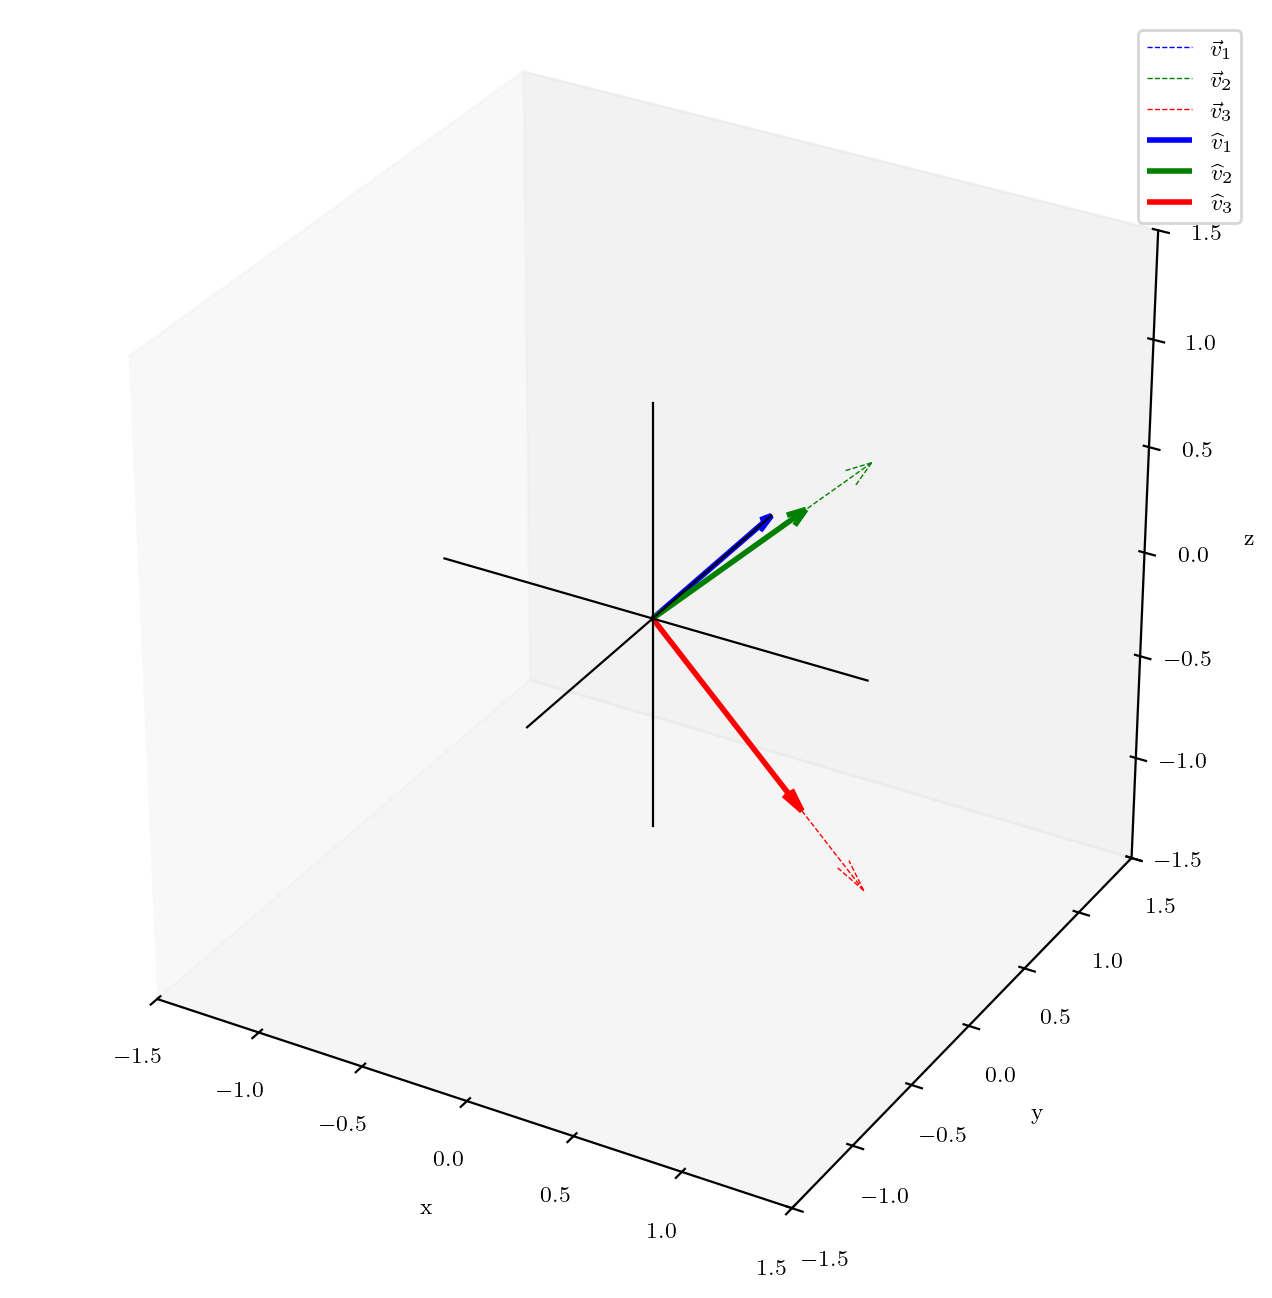

In [11]:
fig = plt.figure(figsize=(10, 8), dpi=200)
ax = fig.add_subplot(111, projection='3d')

anchor = 1
# Axes
ax.plot([-anchor, anchor], [0, 0], [0, 0], color="black", linewidth=0.8, zorder=10)
ax.plot([0, 0], [-anchor, anchor], [0, 0], color="black", linewidth=0.8, zorder=10)
ax.plot([0, 0], [0, 0], [-anchor, anchor], color="black", linewidth=0.8, zorder=10)

v1 = np.array([0, 1, 0])
v2 = np.array([1, 0, 1])
v3 = np.array([1, 0, -1])

for v in [v1, v2, v3]:
    print(f"Panjang vektor {v} = {np.linalg.norm(v)}")

# Normalized (orthonormal) vectors
u1 = v1 / np.linalg.norm(v1)
u2 = v2 / np.linalg.norm(v2)
u3 = v3 / np.linalg.norm(v3)

for u in [u1, u2, u3]:
    print(f"Panjang vektor {u} = {np.linalg.norm(u)}")


# Plot original (before normalization)
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], arrow_length_ratio=0.1, color='blue'    , linewidth=0.5, linestyle='--', label=r'$\vec{v}_1$')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], arrow_length_ratio=0.1, color='green'   , linewidth=0.5, linestyle='--', label=r'$\vec{v}_2$')
ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], arrow_length_ratio=0.1, color='red'     , linewidth=0.5, linestyle='--', label=r'$\vec{v}_3$')

# Plot normalized (after normalization)
ax.quiver(0, 0, 0, u1[0], u1[1], u1[2], arrow_length_ratio=0.1, color='blue'    , linewidth=2    , label=r'$\widehat{v}_1$')
ax.quiver(0, 0, 0, u2[0], u2[1], u2[2], arrow_length_ratio=0.1, color='green'   , linewidth=2   , label=r'$\widehat{v}_2$')
ax.quiver(0, 0, 0, u3[0], u3[1], u3[2], arrow_length_ratio=0.1, color='red'     , linewidth=2     , label=r'$\widehat{v}_3$')

# Styling
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_aspect('equal')
ax.legend()
ax.grid(False)

plt.show()

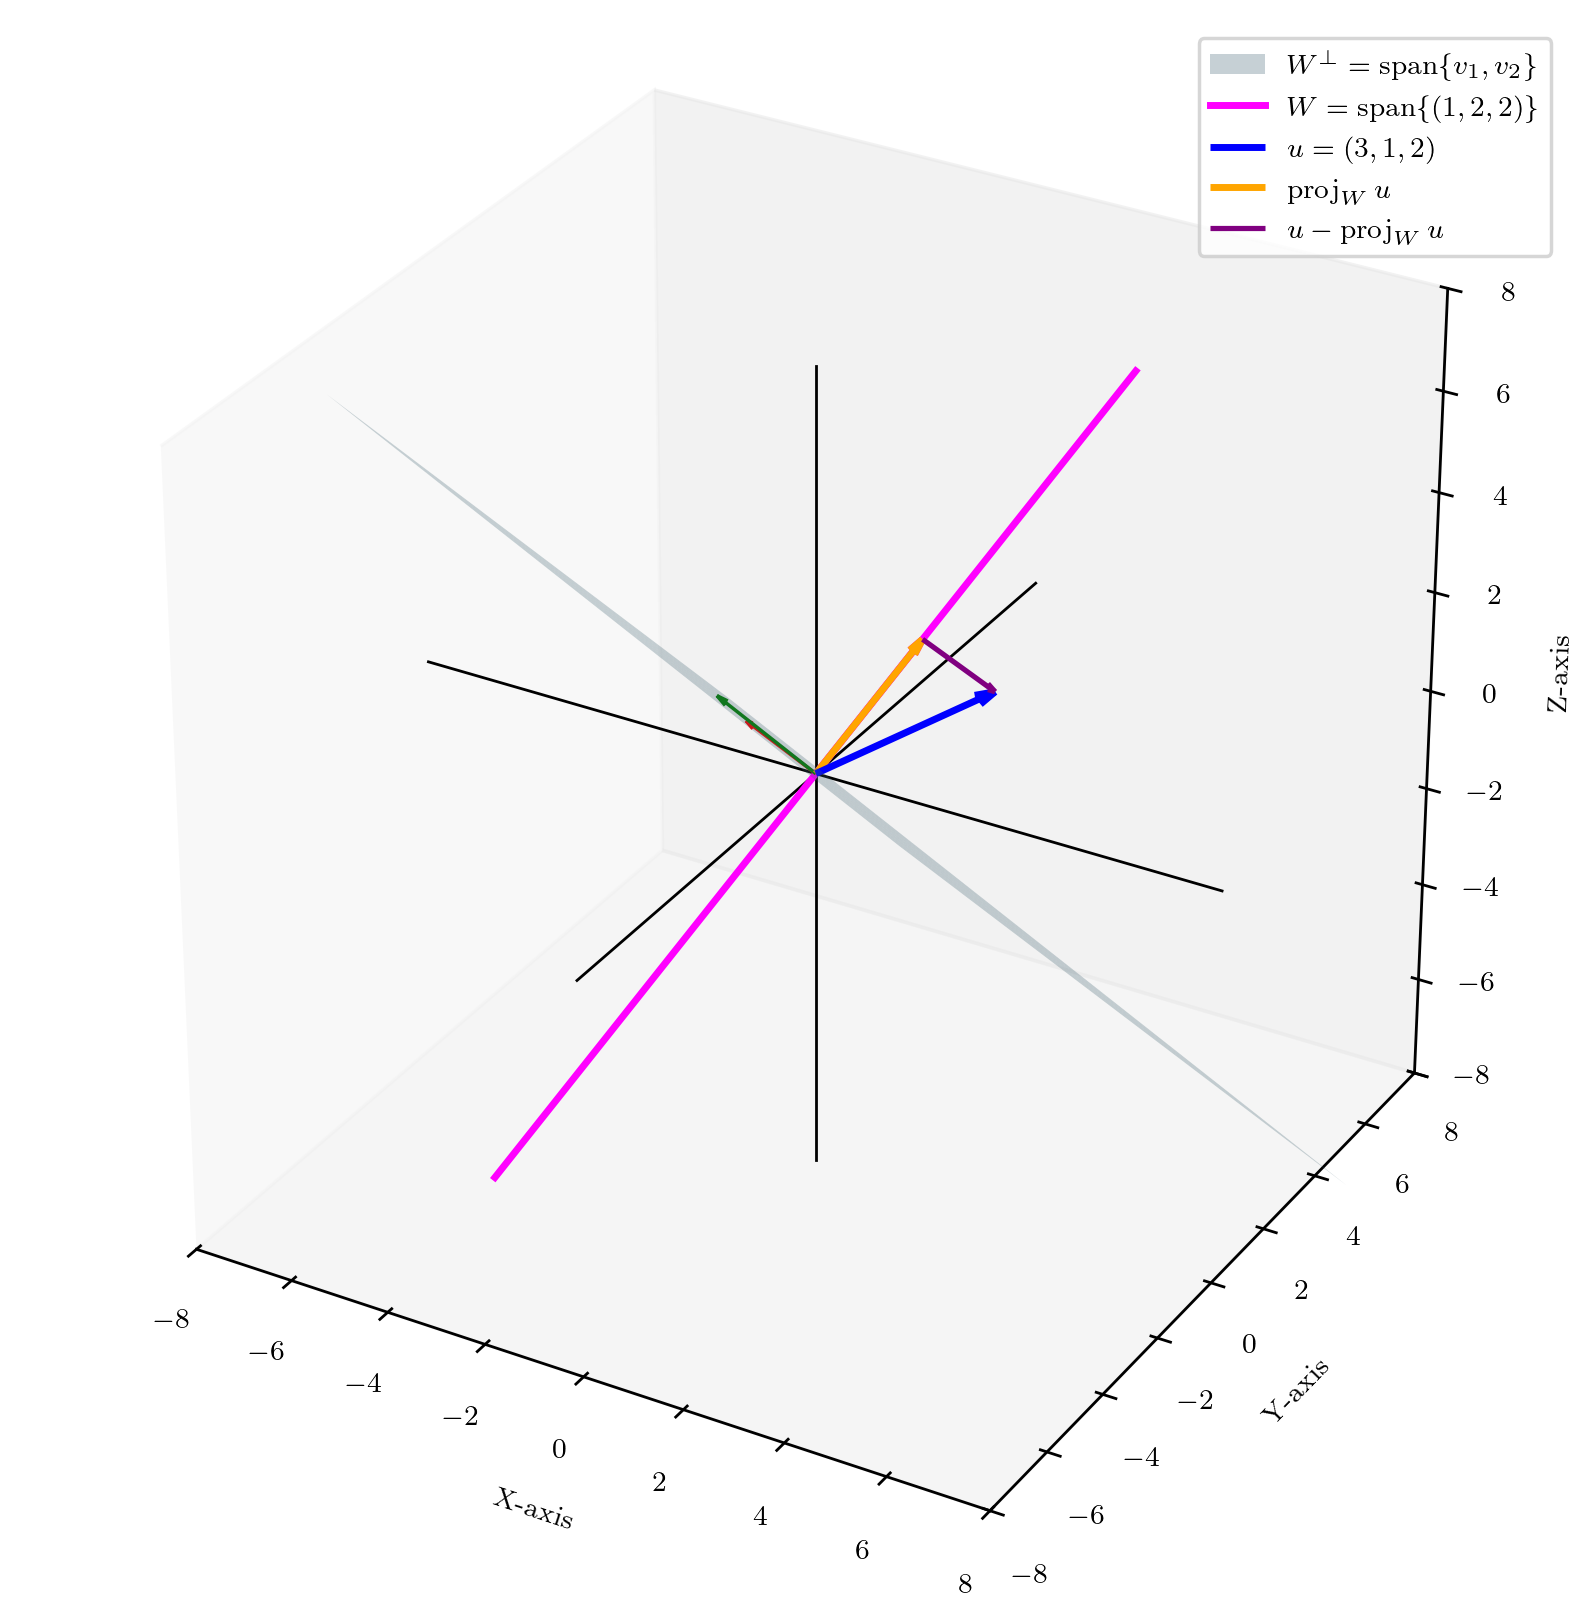

In [13]:

# --- Set up figure ---
fig = plt.figure(figsize=(8, 8), dpi=250)
ax = fig.add_subplot(111, projection='3d')

anchor = 8
ax.plot([-anchor, anchor], [0, 0], [0, 0], color="black", linewidth=0.8)  # X-axis
ax.plot([0, 0], [-anchor, anchor], [0, 0], color="black", linewidth=0.8)  # Y-axis
ax.plot([0, 0], [0, 0], [-anchor, anchor], color="black", linewidth=0.8)  # Z-axis

# --- Define subspace W and its orthogonal complement ---
w = np.array([1, 2, 2])  # Direction vector for W = span{w}
v1 = np.array([-2, 1, 0])  # Basis vector for W⊥
v2 = np.array([-2, 0, 1])  # Another basis vector for W⊥

# --- Create the plane for W⊥ ---
a = np.linspace(-3, 3, 20)
b = np.linspace(-3, 3, 20)
A, B = np.meshgrid(a, b)
X = A * v1[0] + B * v2[0]
Y = A * v1[1] + B * v2[1]
Z = A * v1[2] + B * v2[2]

# --- Plot plane W⊥ ---
ax.plot_surface(X, Y, Z, alpha=0.3, color="skyblue", label=r"$W^{\perp}=\operatorname{span}\{v_1, v_2\}$")

# --- Plot the line W ---
t = np.linspace(-3, 3, 20)
ax.plot(t * w[0], t * w[1], t * w[2], color="magenta", linewidth=2, label=r"$W=\operatorname{span}\{(1,2,2)\}$")

# --- Plot vectors for visual clarity ---
ax.quiver(0, 0, 0, *w, color="magenta", linewidth=2, arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *v1, color="red", linewidth=1, arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *v2, color="green", linewidth=1, arrow_length_ratio=0.1)

u = np.array([3, 1, 2])
proj_u = (np.dot(u, w) / np.dot(w, w)) * w
orth_comp = u - proj_u

ax.quiver(0, 0, 0, *u, color="blue", linewidth=2, arrow_length_ratio=0.1, label=r"$u = (3, 1, 2)$")
ax.quiver(0, 0, 0, *proj_u, color="orange", linewidth=2, arrow_length_ratio=0.1, label=r"$\operatorname{proj}_W u$")
ax.quiver(*proj_u, *orth_comp, color="purple", linewidth=1.5, arrow_length_ratio=0.1, label=r"$u - \operatorname{proj}_W u$")


# --- Axes settings ---
ax.set_xlim([-anchor, anchor])
ax.set_ylim([-anchor, anchor])
ax.set_zlim([-anchor, anchor])
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

ax.set_box_aspect([1, 1, 1])
ax.grid(False)
ax.set_aspect('equal')
ax.legend()
plt.show()

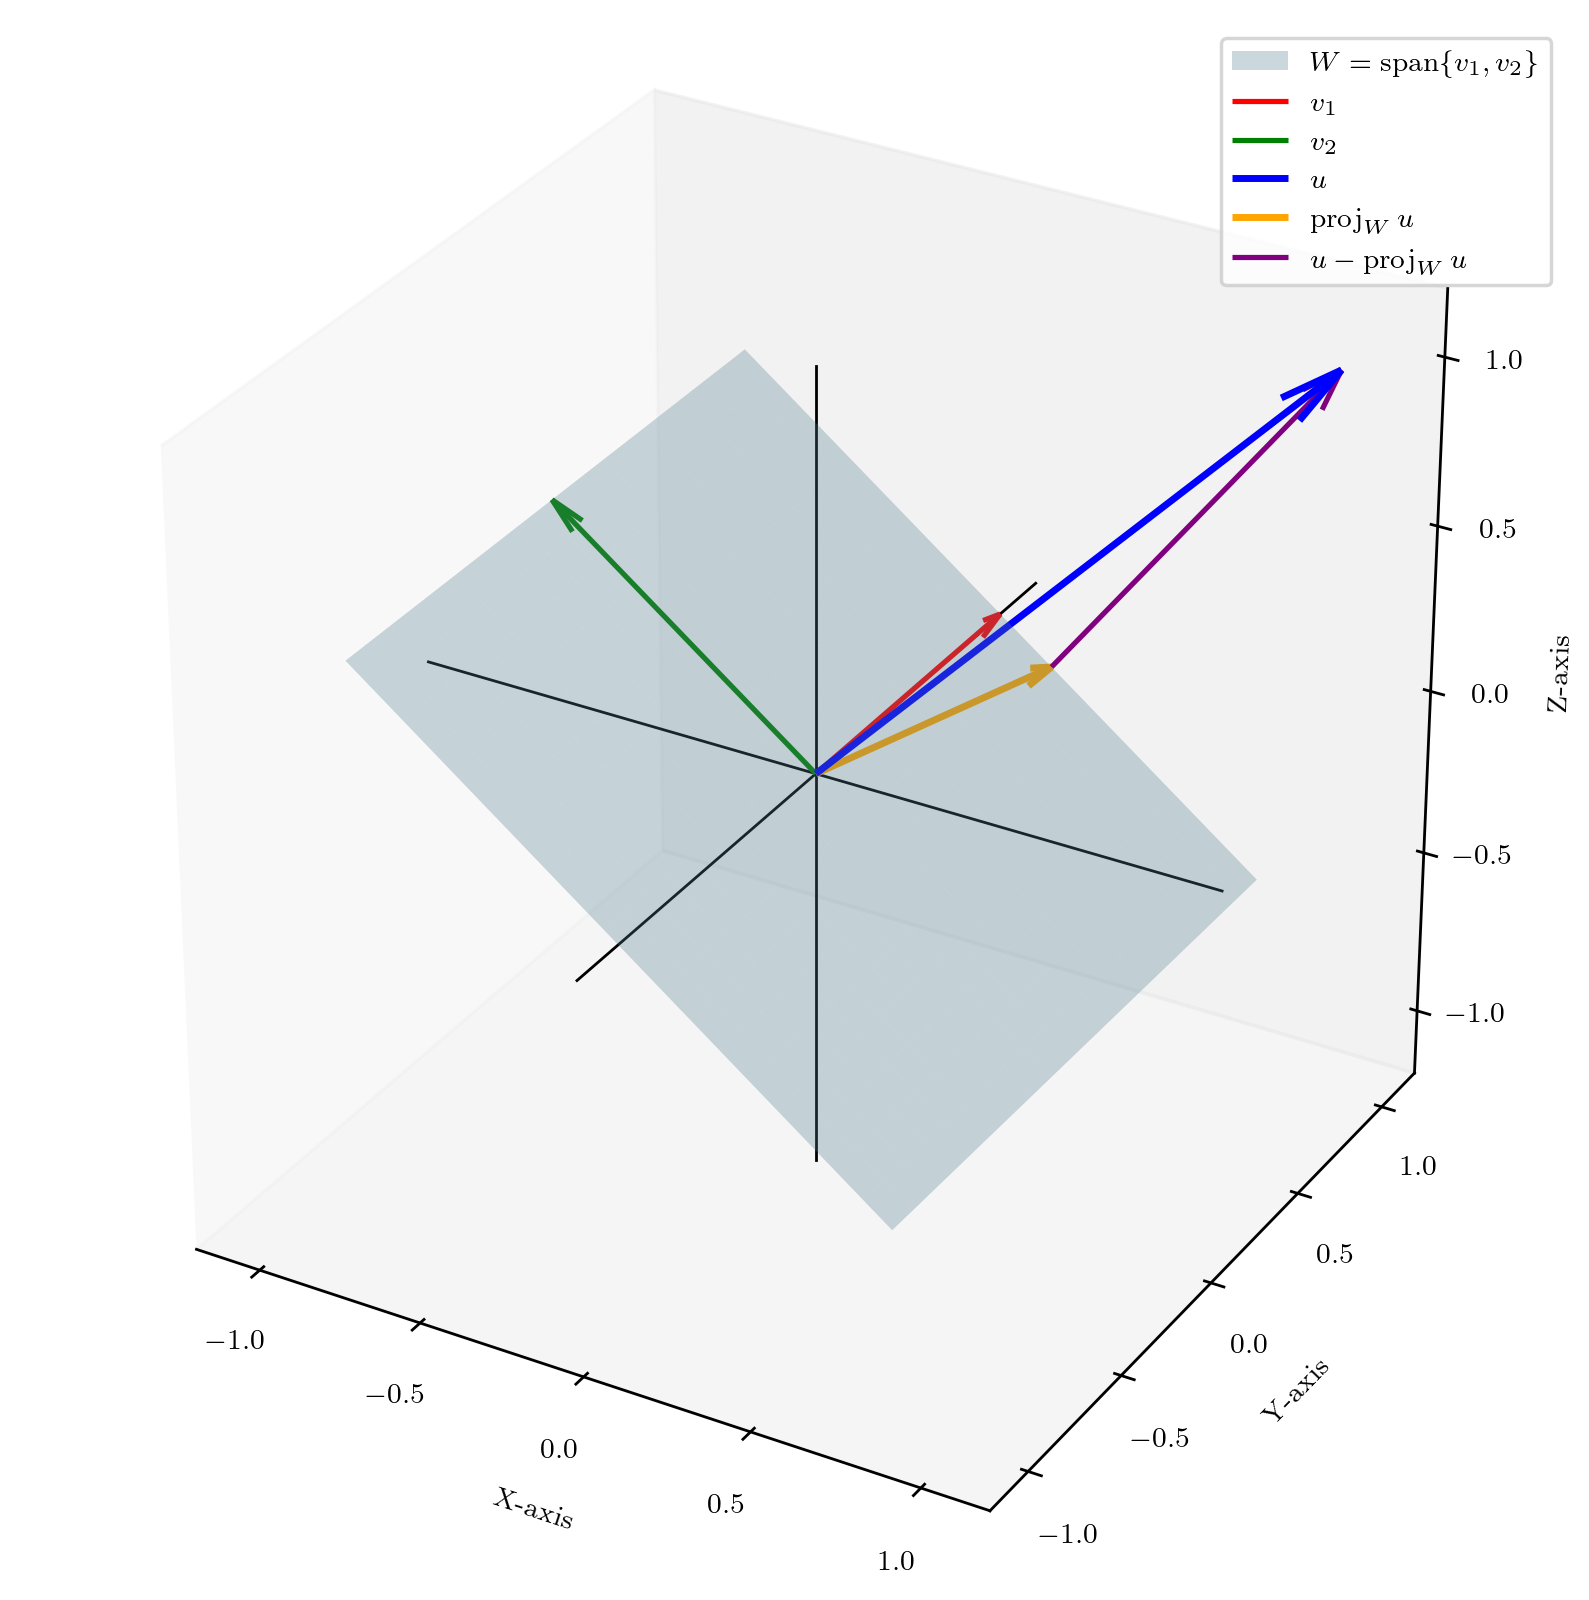

In [14]:
fig = plt.figure(figsize=(8, 8), dpi=250)
ax = fig.add_subplot(111, projection='3d')

anchor = 1.2
ax.plot([-anchor, anchor], [0, 0], [0, 0], color="black", linewidth=0.8)  # X-axis
ax.plot([0, 0], [-anchor, anchor], [0, 0], color="black", linewidth=0.8)  # Y-axis
ax.plot([0, 0], [0, 0], [-anchor, anchor], color="black", linewidth=0.8)  # Z-axis

# --- Define orthonormal basis for W ---
v1 = np.array([0, 1, 0])
v2 = np.array([-4/5, 0, 3/5])

# --- Define vector u ---
u = np.array([1, 1, 1])

# --- Calculate projections ---
proj_W = np.dot(u, v1) * v1 + np.dot(u, v2) * v2
proj_W_perp = u - proj_W

# --- Create a plane for W (spanned by v1 and v2) ---
a = np.linspace(-1, 1, 20)
b = np.linspace(-1, 1, 20)
A, B = np.meshgrid(a, b)
X = A * v1[0] + B * v2[0]
Y = A * v1[1] + B * v2[1]
Z = A * v1[2] + B * v2[2]

# --- Plot plane W ---
ax.plot_surface(X, Y, Z, alpha=0.3, color="skyblue", label=r"$W = \operatorname{span}\{v_1, v_2\}$")

# --- Plot vectors ---
ax.quiver(0, 0, 0, *v1, color="red", linewidth=1.5, arrow_length_ratio=0.1, label=r"$v_1$")
ax.quiver(0, 0, 0, *v2, color="green", linewidth=1.5, arrow_length_ratio=0.1, label=r"$v_2$")
ax.quiver(0, 0, 0, *u, color="blue", linewidth=2, arrow_length_ratio=0.1, label=r"$u$")
ax.quiver(0, 0, 0, *proj_W, color="orange", linewidth=2, arrow_length_ratio=0.1, label=r"$\operatorname{proj}_W u$")
ax.quiver(*proj_W, *proj_W_perp, color="purple", linewidth=1.5, arrow_length_ratio=0.1, label=r"$u - \operatorname{proj}_W u$")

# --- Axes settings ---
ax.set_xlim([-anchor, anchor])
ax.set_ylim([-anchor, anchor])
ax.set_zlim([-anchor, anchor])
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_box_aspect([1, 1, 1])
ax.grid(False)
ax.set_aspect('equal')
ax.legend()
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
C:\Users\user\AppData\Local\Temp\ipykernel_14324\382093298.py:18: SyntaxWarning: invalid escape sequence '\o'
  (u2, [v1, v2]       , [v1]      , [u1, u2]      , [], "Step 2: $v_2 = u_2 - \operatorname{proj}_{W_1} u_2$"),
C:\Users\user\AppData\Local\Temp\ipykernel_14324\382093298.py:19: SyntaxWarning: invalid escape sequence '\o'
  (u3, [v1, v2, v3]   , [v1, v2]  , [u1, u2, u3]  , [], "Step 3: $v_3 = u_3 - \operatorname{proj}_{W_2} u_3$")


Basis plotted i:2
Basis plotted i:3
Basis plotted i:4


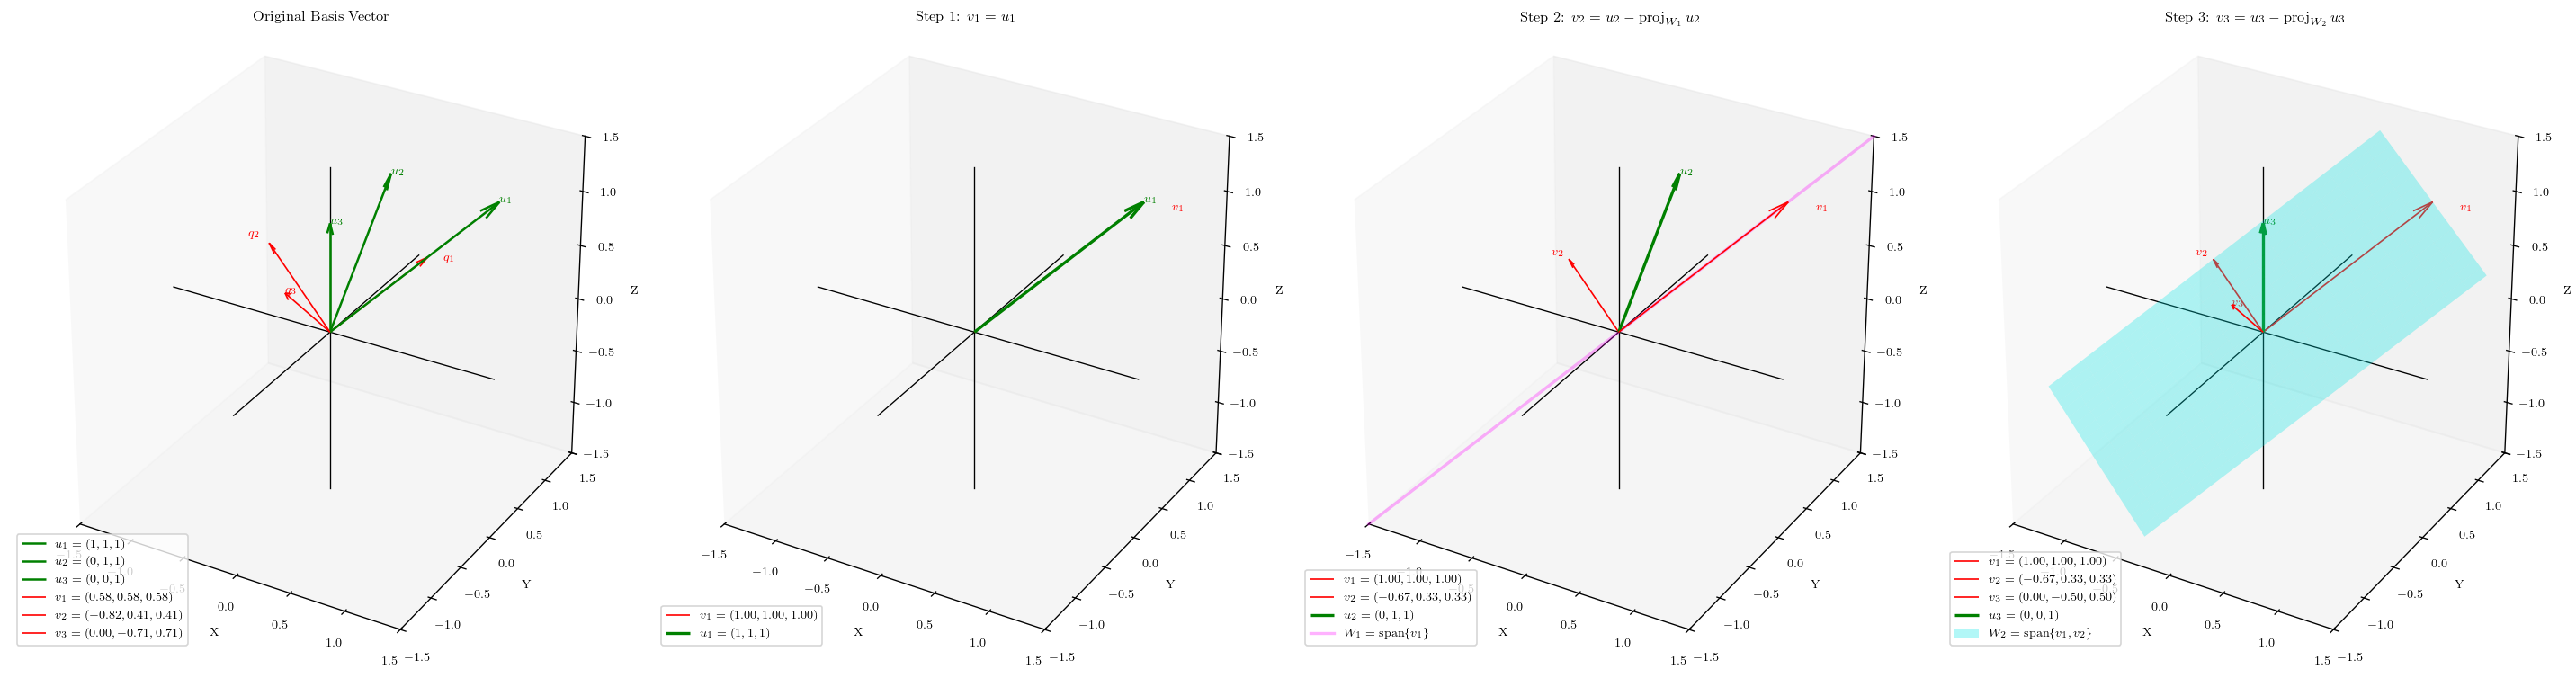

In [17]:

# --- Original vectors ---
u1 = np.array([1, 1, 1])
u2 = np.array([0, 1, 1])
u3 = np.array([0, 0, 1])

# --- Gram-Schmidt process ---
v1 = u1
v2 = u2 - np.dot(u2, v1)/np.dot(v1, v1) * v1
v3 = u3 - np.dot(u3, v1)/np.dot(v1, v1) * v1 - np.dot(u3, v2)/np.dot(v2, v2) * v2

q1 = v1 / np.linalg.norm(v1)
q2 = v2 / np.linalg.norm(v2)
q3 = v3 / np.linalg.norm(v3)

vectors = [
    (u1, [v1, v2, v3]   , None      , [u1, u2, u3]  , [q1, q2, q3], "Original Basis Vector"),
    (u1, [v1]           , None      , [u1]          , [], "Step 1: $v_1 = u_1$"),
    (u2, [v1, v2]       , [v1]      , [u1, u2]      , [], "Step 2: $v_2 = u_2 - \operatorname{proj}_{W_1} u_2$"),
    (u3, [v1, v2, v3]   , [v1, v2]  , [u1, u2, u3]  , [], "Step 3: $v_3 = u_3 - \operatorname{proj}_{W_2} u_3$")
]

anchor = 1.5

# --- Create 3 subplots side by side ---
fig = plt.figure(figsize=(24, 6), dpi=120)

for i, (u, orig_vecs, subspace, basis, orthonormal, title) in enumerate(vectors, 1):
    ax = fig.add_subplot(1, 4, i, projection='3d')

    # Axes
    ax.plot([-anchor, anchor], [0, 0], [0, 0], 'k', linewidth=0.8)
    ax.plot([0, 0], [-anchor, anchor], [0, 0], 'k', linewidth=0.8)
    ax.plot([0, 0], [0, 0], [-anchor, anchor], 'k', linewidth=0.8)

    if i == 1:
        for idx, u in enumerate(basis):
            ax.quiver(0, 0, 0, *u, color='g', linewidth=1.5, arrow_length_ratio=0.1, label=f'$u_{idx+1} = ({u[0]}, {u[1]}, {u[2]})$')
            ax.text(u[0], u[1], u[2], f'$u_{idx+1}$', color='g')

        for idx, v in enumerate(orthonormal):
            ax.quiver(0, 0, 0, *v, color='r', linewidth=1, arrow_length_ratio=0.1, label=f'$v_{idx+1} = ({v[0]:.2f}, {v[1]:.2f}, {v[2]:.2f})$')
            ax.text(v[0] * 1.25, v[1], v[2], f'$q_{idx+1}$', color='r')
        
        ax.set_xlim([-anchor, anchor])
        ax.set_ylim([-anchor, anchor])
        ax.set_zlim([-anchor, anchor])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_box_aspect([1,1,1])
        ax.grid(False)
        ax.set_aspect('equal')
        ax.set_title(title)
        ax.legend(loc='lower left')
        continue
    print(f"Basis plotted i:{i}")

    # Plot all original vectors (gray)
    for idx, v in enumerate(orig_vecs):
        ax.quiver(0, 0, 0, *v, color='r', linewidth=1, arrow_length_ratio=0.1, label=f'$v_{idx+1} = ({v[0]:.2f}, {v[1]:.2f}, {v[2]:.2f})$')
        ax.text(v[0] * 1.25, v[1], v[2], f'$v_{idx+1}$', color='r')
    

    # Plot current orthogonal vector (red)
    ax.quiver(0, 0, 0, *u, color='g', linewidth=2, arrow_length_ratio=0.1, label=f'$u_{i-1} = ({u[0]}, {u[1]}, {u[2]})$')
    ax.text(u[0], u[1], u[2], f'$u_{i-1}$', color='g')

    # Plot subspace if exists
    if subspace is not None:
        if len(subspace) == 1:
            # Line for W1
            w1 = subspace[0]
            t = np.linspace(-1.5, 1.5, 20)
            ax.plot(t*w1[0], t*w1[1], t*w1[2], color='magenta', linewidth=2, alpha=0.3, label=r'$W_1 = \text{span}\{v_1\}$')
        elif len(subspace) == 2:
            # Plane for W2
            a = np.linspace(-1, 1, 20)
            b = np.linspace(-1, 1, 20)
            A, B = np.meshgrid(a, b)
            X = A*subspace[0][0] + B*subspace[1][0]
            Y = A*subspace[0][1] + B*subspace[1][1]
            Z = A*subspace[0][2] + B*subspace[1][2]
            ax.plot_surface(X, Y, Z, color='cyan', alpha=0.3, label=r'$W_2 = \text{span}\{v_1,v_2\}$')

    # Settings
    ax.set_xlim([-anchor, anchor])
    ax.set_ylim([-anchor, anchor])
    ax.set_zlim([-anchor, anchor])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1,1,1])
    ax.grid(False)
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [96]:
import numpy as np

# --- Sample data ---
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

# --- Build design matrix X with intercept ---
X = np.column_stack((np.ones_like(x), x))  # shape (n, 2)

# --- QR decomposition ---
Q, R = np.linalg.qr(X)

# --- Solve for beta using QR ---
beta = np.linalg.inv(R) @ Q.T @ y

print("Estimated coefficients:", beta)
print("R: ", R)
print("R-inv: ", np.linalg.inv(R))
print("Q: ", Q)

Estimated coefficients: [1. 1.]
R:  [[-2.23606798 -6.70820393]
 [ 0.          3.16227766]]
R-inv:  [[-0.4472136  -0.9486833 ]
 [ 0.          0.31622777]]
Q:  [[-4.47213595e-01 -6.32455532e-01]
 [-4.47213595e-01 -3.16227766e-01]
 [-4.47213595e-01  1.11022302e-16]
 [-4.47213595e-01  3.16227766e-01]
 [-4.47213595e-01  6.32455532e-01]]


In [107]:
u1 = np.ones(5).reshape(5,1)
u2 = np.array([1, 2, 3, 4, 5]).reshape(5,1)

q1 = 1/np.linalg.norm(u1) * u1
q2 = 1/np.linalg.norm(u2) * u2

Q = np.array([q1, q2]).reshape(5,2)
R = Q.T @ X
R_inv = np.linalg.inv(R)


In [109]:
R_inv @ Q.T @ y

array([1., 1.])

In [115]:
import sympy as sp

# --- Symbols ---
x = sp.Matrix([1, 2, 3, 4, 5])  # column vector
u1 = sp.Matrix([1, 1, 1, 1, 1])
u2 = sp.Matrix([1, 2, 3, 4, 5])
Y = sp.Matrix([2,3,4,5,6])

# --- Orthonormalize manually (Gram-Schmidt) ---
q1 = u1 / u1.norm()
# Project u2 onto q1
proj = (q1.dot(u2)) * q1
q2 = (u2 - proj) / (u2 - proj).norm()

# --- Assemble Q ---
Q = sp.Matrix.hstack(q1, q2)

# --- Original design matrix X ---
X = sp.Matrix.hstack(sp.ones(5,1), x)

# --- Compute R and R inverse ---
R = Q.T * X
R_inv = R.inv()
C = Q.T * Y
beta = R_inv * Q.T * Y
# --- Display nicely ---
sp.pprint(Q, use_unicode=True)
sp.pprint(R, use_unicode=True)
sp.pprint(R_inv, use_unicode=True)
sp.pprint(C, use_unicode=True)
sp.pprint(beta, use_unicode=True)


⎡√5  -√10 ⎤
⎢──  ─────⎥
⎢5     5  ⎥
⎢         ⎥
⎢√5  -√10 ⎥
⎢──  ─────⎥
⎢5    10  ⎥
⎢         ⎥
⎢√5       ⎥
⎢──    0  ⎥
⎢5        ⎥
⎢         ⎥
⎢√5   √10 ⎥
⎢──   ─── ⎥
⎢5    10  ⎥
⎢         ⎥
⎢√5   √10 ⎥
⎢──   ─── ⎥
⎣5     5  ⎦
⎡√5  3⋅√5⎤
⎢        ⎥
⎣0   √10 ⎦
⎡√5  -3⋅√10 ⎤
⎢──  ───────⎥
⎢5     10   ⎥
⎢           ⎥
⎢      √10  ⎥
⎢0     ───  ⎥
⎣      10   ⎦
⎡4⋅√5⎤
⎢    ⎥
⎣√10 ⎦
⎡1⎤
⎢ ⎥
⎣1⎦


In [110]:
3 * np.sqrt(5)

6.708203932499369

In [104]:
q2/(1/np.sqrt(10))

array([[0.42640143],
       [0.85280287],
       [1.2792043 ],
       [1.70560573],
       [2.13200716]])